# 2439.最小化数组中的最大值

本笔记包含力扣题目 [2439.最小化数组中的最大值](https://leetcode.cn/problems/minimize-maximum-of-array/) 的求解动画演示代码，动画基于 [algviz](https://github.com/zjl9959/algviz) 算法动画引擎实时在线渲染。

*相关链接：[algviz 官网](https://algviz.com)，[algviz 安装方式](https://algviz.com/cn/installation.html)，[algviz 使用教程](https://algviz.com/cn/examples.html)， [algviz 接口 API 文档](https://algviz.readthedocs.io/en/latest/)。*

## 解题思路

二分法 + 贪心模拟，具体思路可以参考灵神的题解：https://leetcode.cn/problems/minimize-maximum-of-array/solution/liang-chong-zuo-fa-er-fen-da-an-fen-lei-qhee6/

## 算法演示代码

请依次运行下方单元格中的代码来生成可视化动画！👇

您可以尝试修改代码中的输入参数，来观察不同情况下的运行动画。

*如果您在运行中遇到了报错，麻烦把报错日志提交到这里（[Algviz Github issues](https://github.com/zjl9959/algviz/issues)），也可以直接发我邮箱（zjl9959@gmail.com），谢谢！*

In [3]:
import algviz

# Code.S
class Solution:
    def minimizeArrayValue(self, nums):
        # Alias.S:l = 0; r = max(nums) + 1;
        viz = algviz.Visualizer()
        nums_copy = [i for i in nums]
        nums = viz.createVector(nums, '输入数据（nums）')
        l = viz.createCursor(0, '左边界')
        r = viz.createCursor(max(nums) + 1, '右边界')
        limit = viz.createCursor(0, '中值')
        log = viz.createLogger(3, '运行日志')
        viz.display()
        # Alias.E
        search = viz.createVector([i for i in range(max(nums) + 2)], '二分搜索区间', show_index=False)  # Hide
        search[l]; search[r]; search[limit]             # Hide
        while l < r:
            # Block.S
            limit << (l + r) // 2                       # Alias: limit = (l + r) // 2
            viz.display()                               # Hide
            # Block.E
            i = viz.createCursor(len(nums) - 1, 'i')    # Alias: i = 0
            log.write('开始从右向左贪心模拟')     # Hide
            while i > 0:
                if limit < nums[i]:
                    # Block.S
                    log.write('将{}中多于{}的部分转移到{}中'.format(nums[i], limit.index(), nums[i-1]))     # Hide
                    delt = limit - nums[i]
                    nums[i] += delt
                    nums[i - 1] -= delt
                    i -= 1
                    viz.display(3)   # Hide
                    # Block.E
                else:
                    # Block.S
                    i -= 1
                    viz.display()   # Hide
                    # Block.E
            viz.removeCursor(i)     # Hide
            # Block.S
            if limit < nums[0]:
                l << limit + 1      # Alias: l = limit + 1
                log.write('更新搜索区间左边界')     # Hide
            else:
                r << limit          # Alias: r = limit
                log.write('更新搜索区间右边界')     # Hide
            # Alias.S:# 复原nums数组
            for i in range(len(nums_copy)):
                nums[i] = nums_copy[i]
            viz.display()
            # Alias.E
            # Block.E
        # Alias.S:return (l + r) // 2
        limit << (l + r) // 2
        log.write('搜索完成，结果为{}'.format(limit.index()))
        viz.display()
        return limit.index()
        # Alias.E
# Code.E

输入数据（nums）:

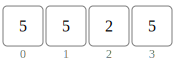

运行日志:

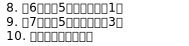

二分搜索区间:

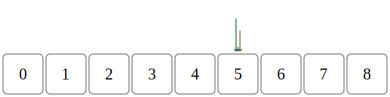

5

In [4]:
# Case1
nums = [3, 7, 1, 6]
Solution().minimizeArrayValue(nums)

In [ ]:
# Case2
nums = [10, 1]
Solution().minimizeArrayValue(nums)

## 可提交版本代码

In [ ]:
class Solution:
    def minimizeArrayValue(self, nums):
        nums_copy = [i for i in nums]
        l = 0
        r = max(nums) + 1
        while l < r:
            limit = (l + r) // 2
            i = len(nums) - 1
            while i > 0:
                if limit < nums[i]:
                    delt = limit - nums[i]
                    nums[i] += delt
                    nums[i - 1] -= delt
                i -= 1
            if limit < nums[0]:
                l = limit + 1
            else:
                r = limit
            for i in range(len(nums_copy)):
                nums[i] = nums_copy[i]
        return (l + r) // 2